In [1]:
!pip install jieba

In [2]:
!jupyter labextension list

JupyterLab v3.2.9
/opt/conda/share/jupyter/labextensions
        jupyter-matplotlib v0.10.5 enabled OK
        jupyterlab-plotly v5.6.0 enabled OK
        @jupyter-widgets/jupyterlab-manager v3.0.1 enabled OK (python, jupyterlab_widgets)



In [3]:
!pip install "jupyterlab>=3" "ipywidgets>=7.6"

In [4]:
!pip install gensim

In [5]:
!mkdir jieba_data

mkdir: cannot create directory ‘jieba_data’: File exists


In [6]:
!wget https://github.com/fxsjy/jieba/raw/master/extra_dict/dict.txt.big -O jieba_data/dict.txt.big

--2022-03-07 13:34:51--  https://github.com/fxsjy/jieba/raw/master/extra_dict/dict.txt.big
Resolving github.com (github.com)... 52.69.186.44
Connecting to github.com (github.com)|52.69.186.44|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/fxsjy/jieba/master/extra_dict/dict.txt.big [following]
--2022-03-07 13:34:51--  https://raw.githubusercontent.com/fxsjy/jieba/master/extra_dict/dict.txt.big
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8583143 (8.2M) [text/plain]
Saving to: ‘jieba_data/dict.txt.big’

jieba_data/dict.txt 100%[===================>]   8.18M  12.7MB/s    in 0.6s    

2022-03-07 13:34:52 (12.7 MB/s) - ‘jieba_data/dict.txt.big’ saved [8583143/8583143]



### 載入 jieba 函式庫

In [7]:
import jieba
import time

### 載入繁體中文詞庫

In [8]:
jieba.set_dictionary('jieba_data/dict.txt.big')

### 開啟文字檔

In [9]:
# 開檔
fileAllLines = []
with open('Three Kingdoms.txt') as fileLine:
    for line in fileLine:
        #print(line)
        fileAllLines.append(line)
    

In [10]:
fileAllLines

['《三國演義》作者：羅貫中\n',
 '\n',
 '簡介\n',
 '\u3000\u3000三國演義是一本長篇歷史小說，可以說是中國古代長篇章回小說的開山之作，亦是四大名著之一。作者是明朝的羅貫中。故事自黃巾起義起，終於西晉統一。是書陳敘百年，賅括萬事，七實三虛。三國指的是魏，蜀，吳。小說通篇精巧敘述謀略，被譽為中國謀略全書。\n',
 '\u3000\u3000羅貫中（1330年一1400年之間），名本，號湖海散人，明代通俗小說家。他的籍貫一說是太原（今山西），一說是錢塘（今浙江杭州），不可確考。據傳說，羅貫中曾充任過元末農民起義軍張士誠的幕客．除《三國誌通俗演義》外，他還創作有《隋唐志傳》等通俗小說和《趙太祖龍虎風雲會》等戲劇。另外，有相當一部分人認為《水滸傳》後三十回也是其所作。\n',
 '\n',
 '目錄\n',
 '\n',
 '第001回\u3000宴桃園豪傑三結義\u3000斬黃巾英雄首立功 第002回\u3000張翼德怒鞭督郵\u3000何國舅謀誅宦豎 \n',
 '第003回\u3000議溫明董卓叱丁原\u3000饋金珠李肅說呂布 第004回\u3000廢漢帝陳留踐位\u3000謀董賊孟德獻刀 \n',
 '第005回\u3000發矯詔諸鎮應曹公\u3000破關兵三英戰呂布 第006回\u3000焚金闕董卓行兇\u3000匿玉璽孫堅背約 \n',
 '第007回\u3000袁紹磐河戰公孫\u3000孫堅跨江擊劉表 第008回\u3000王司徒巧使連環計\u3000董太師大鬧鳳儀亭 \n',
 '第009回\u3000除暴凶呂布助司徒\u3000犯長安李傕聽賈詡 第010回\u3000勤王室馬騰舉義\u3000報父仇曹操興師 \n',
 '第011回\u3000劉皇叔北海救孔融\u3000呂溫侯濮陽破曹操 第012回\u3000陶恭祖三讓徐州\u3000曹孟穗大戰呂布 \n',
 '第013回\u3000李傕郭汜大交兵\u3000楊奉董承雙救駕 第014回\u3000曹孟德移駕幸許都\u3000呂奉先乘夜襲徐郡 \n',
 '第015回\u3000太史慈酣鬥小霸王\u3000孫伯符大戰嚴白虎 第016回\u3000呂奉先射戟轅門\u3000曹孟德敗師淯水 \n',
 '第017回\u3000袁公路大起七軍\u3000曹孟德會合三將 第018

### 斷詞測試

#### 詞性說明: https://gist.github.com/luw2007/6016931

In [11]:
import jieba.posseg as pseg
#jieba.enable_paddle()
text = "三國演義是一本長篇歷史小說，可以說是中國古代長篇章回小說的開山之作，亦是四大名著之一。作者是明朝的羅貫中。故事自黃巾起義起，終於西晉統一。是書陳敘百年，賅括萬事，七實三虛。三國指的是魏，蜀，吳。小說通篇精巧敘述謀略，被譽為中國謀略全書。"
results = pseg.lcut(text, use_paddle=False)
s = []
for w, p in results:
    if p in ['n', 'nr','ns','nt','nz','nl','ng', 't', 's','vn']:
        print("%s, %s"%(w, p))
        s.append(w)
new_line = ' '.join(s)
new_line

Building prefix dict from /home/jovyan/work/jieba_data/dict.txt.big ...
Dumping model to file cache /tmp/jieba.ud3c40470d3518910bfd0dc86d865fad4.cache
Loading model cost 2.627 seconds.
Prefix dict has been built successfully.


三國演義, nz
中國, ns
古代, t
章回小說, n
開山, ns
作, n
作者, n
明朝, t
羅貫中, nr
故事, n
黃巾起義, nr
西晉, t
統一, vn
書, n
陳敘, nr
萬事, n
三國, ns
魏, nr
吳, nr
小說, n
通篇, n
謀略, n
中國, ns
謀略, n
全書, n


'三國演義 中國 古代 章回小說 開山 作 作者 明朝 羅貫中 故事 黃巾起義 西晉 統一 書 陳敘 萬事 三國 魏 吳 小說 通篇 謀略 中國 謀略 全書'

### 進行斷字斷詞

In [12]:
# 斷詞
start_time = time.time()
import jieba.posseg as pseg
#jieba.enable_paddle()
jieba.enable_parallel(4)
seg = []
for i in range(len(fileAllLines)):
    #cut_list = list( jieba.cut(fileAllLines[i], cut_all = False) )
    #seg.append([' '.join([ item for item in cut_list if len(item) > 1 ])])
    cut_result = list(pseg.cut(fileAllLines[i], use_paddle=False))
    each_line_list = []
    for w, p in cut_result:
        #print("%s: %s"%(w, p))
        if p in ['n', 'nr','ns','nt','nz','nl','ng', 't', 's','vn']:
            #print("%s: %s"%(w, p))
            each_line_list.append(w)
    new_line = ' '.join(each_line_list)
    #print(new_line)
    seg.append(new_line)
print("--- spend %s seconds ---" % (time.time() - start_time))

--- spend 243.0251898765564 seconds ---


In [13]:
print(len(seg))

6001


In [14]:
#seg = [ s for s in seg if len(s) > 0] 
seg

['三國演義 作者 羅貫中',
 '',
 '',
 '三國演義 中國 古代 章回小說 開山 作 作者 明朝 羅貫中 故事 黃巾起義 西晉 統一 書 陳敘 萬事 三國 魏 吳 小說 通篇 謀略 中國 謀略 全書',
 '羅貫中 名本 湖海 散人 明代 籍貫 太原 山西 錢塘 浙江 杭州 據傳說 羅貫中 過元末 農民 起義軍 張士誠 幕客 三國 通俗 演義 創作 隋唐 志傳 太祖 龍虎風雲 戲劇 人 水滸傳 作',
 '',
 '目錄',
 '',
 '宴 桃園 結義 黃巾 英雄 立功 張翼德 鞭督 郵 何國舅 宦',
 '議溫 董卓 饋金 珠 李肅 呂布 漢帝 陳留 董賊 孟德獻刀',
 '矯詔 諸鎮 曹公 兵 戰呂布 金闕 董卓 行兇 玉璽 孫堅 背約',
 '袁紹 磐河 戰 公孫 孫堅 江 劉表 王司徒 董 太師 鳳儀亭',
 '除暴 呂布 司徒 長安 李 賈 王室 馬騰 報父仇 曹操 興師',
 '劉皇叔 北海 孔融 呂溫侯 濮陽 曹操 陶恭祖 徐州 曹孟穗 戰呂布',
 '李 郭 交兵 楊奉 董承雙 曹孟德 呂奉先 徐郡',
 '太史慈 小霸王 孫伯符 大戰 嚴白虎 呂奉先 射戟 轅門 曹孟德 師 水',
 '袁 公路 軍 曹孟德 賈文 料 敵 夏侯惇 矢 睛',
 '邳城 曹操 白門樓 呂布 曹阿 許田 董國舅 內閣 詔',
 '曹操 酒論 英雄 關公 城 車胄 袁 曹 關張 擒王 劉二',
 '衣 賊 吉 太醫 國賊 行兇 貴妃 皇叔 投 袁紹',
 '屯 土山 關公 事 白馬 曹操 重圍 袁本初 敗兵 關雲長 封金',
 '美髯公 走單騎 漢壽 侯 五關 蔡陽 兄弟 古城 主臣 聚義',
 '小霸王 於吉 碧 眼兒 江東 戰 官渡 本初 敗績 烏巢 孟德 糧',
 '曹操 倉 亭 本初 玄德 荊州 劉表 冀州 袁尚 漳河',
 '曹丕 甄氏 郭嘉遺 遼東 蔡夫人 屏 密語 劉皇叔 過檀溪',
 '玄德 南漳 單福 新野 英主 玄德 樊城 走馬 諸葛',
 '司馬徽 名士 劉玄德 隆中 決策 戰 長江 孫氏',
 '荊州 城 公子 博望坡 軍師 用兵 蔡夫人 議獻 荊州 諸葛亮 火燒 新野',
 '劉玄德 攜民 渡江 趙子龍 單騎 張翼德 長阪 橋 劉豫州 漢津口',
 '諸葛亮 舌戰 群儒 魯子敬 眾議 孔明 周瑜 孫權 曹操',
 '三江口 曹操 折

### 準備存檔，將斷好的字詞存下來。先刪除之前留下的紀錄檔案(segDone.txt)

In [15]:
!rm -f segDone.txt

### 斷詞結果存檔

In [16]:
# 斷詞結果存檔
segSaveFile = 'segDone.txt'
with open(segSaveFile, 'wb') as saveFile:
    for i in range(len(seg)):
        #words = seg[i][0].encode('utf-8')
        words = seg[i].encode('utf-8')
        if len(words) > 0:
            saveFile.write(words)
            saveFile.write('\n'.encode())

In [17]:
!head -10 segDone.txt

三國演義 作者 羅貫中
三國演義 中國 古代 章回小說 開山 作 作者 明朝 羅貫中 故事 黃巾起義 西晉 統一 書 陳敘 萬事 三國 魏 吳 小說 通篇 謀略 中國 謀略 全書
羅貫中 名本 湖海 散人 明代 籍貫 太原 山西 錢塘 浙江 杭州 據傳說 羅貫中 過元末 農民 起義軍 張士誠 幕客 三國 通俗 演義 創作 隋唐 志傳 太祖 龍虎風雲 戲劇 人 水滸傳 作
目錄
宴 桃園 結義 黃巾 英雄 立功 張翼德 鞭督 郵 何國舅 宦
議溫 董卓 饋金 珠 李肅 呂布 漢帝 陳留 董賊 孟德獻刀
矯詔 諸鎮 曹公 兵 戰呂布 金闕 董卓 行兇 玉璽 孫堅 背約
袁紹 磐河 戰 公孫 孫堅 江 劉表 王司徒 董 太師 鳳儀亭
除暴 呂布 司徒 長安 李 賈 王室 馬騰 報父仇 曹操 興師
劉皇叔 北海 孔融 呂溫侯 濮陽 曹操 陶恭祖 徐州 曹孟穗 戰呂布


In [18]:
!cat segDone.txt | wc -c

751665


### 載入word2vec 函式庫
### 參考網頁：https://radimrehurek.com/gensim/models/word2vec.html

In [19]:
from gensim.models import word2vec

### 一行一行的從檔案中取出句子：一行一個句子，句子中的字必須預先處理好並以空白隔開

In [20]:
sentences = word2vec.LineSentence("segDone.txt")

### 訓練模型
#### ref: https://radimrehurek.com/gensim/auto_examples/tutorials/run_word2vec.html
#### size: 向量維度 = 300
#### sg: 0(CBOW), 1(Skip-gram)

In [21]:
start_time = time.time()
model = word2vec.Word2Vec(sentences, vector_size=300, sg=1, window=10, workers=3, min_count=2)
print("--- spend %s seconds ---" % (time.time() - start_time))

--- spend 4.8285441398620605 seconds ---


In [22]:
model

### 儲存訓練好的word2vec 模型

In [23]:
model.save("word2vec.model")

In [24]:
model.corpus_total_words

114600

# 詞相似度

In [25]:
model.wv.most_similar('赤壁')

[('廬江', 0.9908397197723389),
 ('安東', 0.9895911812782288),
 ('朱治', 0.9894770979881287),
 ('家屬', 0.9892894625663757),
 ('下壇', 0.9892057776451111),
 ('中國', 0.9880990386009216),
 ('韓當', 0.9877662658691406),
 ('現', 0.9877427220344543),
 ('巢湖', 0.9874600172042847),
 ('張昭奏', 0.9872725605964661)]

In [26]:
model.wv.similar_by_word('赤壁')

[('廬江', 0.9908397197723389),
 ('安東', 0.9895911812782288),
 ('朱治', 0.9894770979881287),
 ('家屬', 0.9892894625663757),
 ('下壇', 0.9892057776451111),
 ('中國', 0.9880990386009216),
 ('韓當', 0.9877662658691406),
 ('現', 0.9877427220344543),
 ('巢湖', 0.9874600172042847),
 ('張昭奏', 0.9872725605964661)]

In [27]:
model.wv.similarity('曹操','呂布')

0.47441396

In [28]:
model.wv.similar_by_word('曹操')

[('張魯', 0.8907380104064941),
 ('郭圖', 0.8851498365402222),
 ('袁尚', 0.8715824484825134),
 ('冀州', 0.8635812997817993),
 ('商議', 0.8634910583496094),
 ('謀士', 0.8597530722618103),
 ('許都', 0.8590707182884216),
 ('空虛', 0.8548344373703003),
 ('許昌', 0.851923942565918),
 ('官渡', 0.8443627953529358)]

In [29]:
model.wv.similar_by_word('呂布')

[('布', 0.903464138507843),
 ('陳宮', 0.8444843888282776),
 ('濮陽', 0.7382066249847412),
 ('宮', 0.7262364625930786),
 ('袁術', 0.7250919342041016),
 ('兗州', 0.7243080735206604),
 ('徐州', 0.714767336845398),
 ('戟', 0.6853524446487427),
 ('呂', 0.6846452951431274),
 ('陳', 0.6606199145317078)]

In [30]:
model.wv.similarity('孔明','諸葛亮')

0.82577467

In [31]:
model.wv.similar_by_word('孔明')

[('孔明曰', 0.8774569034576416),
 ('孔明笑', 0.8677845001220703),
 ('孟獲', 0.8652433753013611),
 ('鄧芝', 0.8459634780883789),
 ('洞', 0.8401122689247131),
 ('馬謖', 0.837695300579071),
 ('計策', 0.8282113671302795),
 ('諸葛亮', 0.8257747292518616),
 ('雍', 0.8154689073562622),
 ('酒食', 0.8139007687568665)]

In [32]:
model.wv.similar_by_word('諸葛亮')

[('計', 0.9360169768333435),
 ('孔明之', 0.9307423830032349),
 ('南郡', 0.9225013256072998),
 ('用兵', 0.9166972637176514),
 ('雍', 0.9133443832397461),
 ('文書', 0.9115316867828369),
 ('渡江', 0.9112644791603088),
 ('即日', 0.9019697308540344),
 ('人報', 0.8978093862533569),
 ('柴桑', 0.8951310515403748)]

In [33]:
model.wv.similarity('孔明','周瑜')

0.6684996

In [34]:
model.wv.similarity('孔明','司馬懿')

0.7554592

In [35]:
#input_string = input('關鍵字:')
#model.wv.similar_by_word(input_string)

# 詞預測

In [36]:
result = model.predict_output_word('關羽')
result

[('司馬懿', 0.0004941294),
 ('魏延', 0.0004346441),
 ('漢中', 0.00040765438),
 ('魏兵', 0.00038772894),
 ('黃忠', 0.00038607902),
 ('汝', 0.00035509883),
 ('忠', 0.0003547384),
 ('王', 0.00033675323),
 ('趙雲', 0.00033372524),
 ('孔明', 0.00032997844)]

# 類推 (analogy)

#### 基本範例 (https://radimrehurek.com/gensim/models/keyedvectors.html)

In [37]:
import gensim.downloader as api

In [38]:
word_vectors = api.load("glove-wiki-gigaword-100")  # load pre-trained word-vectors from gensim-data

[============--------------------------------------] 24.1% 30.8/128.1MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[==========================------------------------] 52.2% 66.9/128.1MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[====================================--------------] 72.5% 92.9/128.1MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[==================================================] 100.0% 128.1/128.1MB downloaded


In [39]:
result = word_vectors.most_similar(positive=['woman', 'king'], negative=['man'])
print("{}: {:.4f}".format(*result[0]))

queen: 0.7699


In [40]:
result = word_vectors.most_similar_cosmul(positive=['woman', 'king'], negative=['man'])
print("{}: {:.4f}".format(*result[0]))

queen: 0.8965


In [41]:
ans1 = model.wv.most_similar(positive=['曹操','孔明'], negative=['孫權'])
print("%s: %s"%(ans1[0]))

馬謖: 0.8573368191719055


In [42]:
from sklearn.decomposition import IncrementalPCA    # inital reduction
from sklearn.manifold import TSNE                   # final reduction
import numpy as np                                  # array handling

In [43]:
def reduce_dimensions(model):
    num_dimensions = 2  # final num dimensions (2D, 3D, etc)

    # extract the words & their vectors, as numpy arrays
    vectors = np.asarray(model.wv.vectors)
    labels = np.asarray(model.wv.index_to_key)  # fixed-width numpy strings

    # reduce using t-SNE
    tsne = TSNE(n_components=num_dimensions, random_state=0)
    vectors = tsne.fit_transform(vectors)

    x_vals = [v[0] for v in vectors]
    y_vals = [v[1] for v in vectors]
    return x_vals, y_vals, labels


x_vals, y_vals, labels = reduce_dimensions(model)

/opt/conda/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [44]:
print(x_vals)
print(y_vals)
print(labels)

[-34.83409, -10.964372, -59.75731, -45.046703, -56.953686, -46.07597, -61.734085, -64.02253, -64.1824, -34.92226, -64.06702, -76.22118, -57.40691, -63.029755, -15.215062, -61.091362, -62.335423, -62.970566, -62.20487, -70.58021, -72.07865, -46.21043, -37.63863, -50.059444, -61.75957, -63.741173, 1.4944531, -63.257786, -71.805275, -72.44926, -56.644455, -47.604527, -72.807884, -44.530483, -67.60503, -70.58261, -68.133095, -71.5509, -67.58783, -62.923126, -47.19663, -47.242607, -67.6067, -65.1469, -75.20899, -71.79531, -46.787136, -70.578094, -67.50459, -72.70962, -72.72642, -47.338844, -55.563404, -69.37092, -45.86166, -70.66669, -63.246223, -53.464417, -43.405315, -28.705236, -43.55995, -65.37072, -71.00299, -65.627335, -59.318752, -74.79029, -79.086334, -75.49034, -63.246937, -59.25743, -35.26924, -64.4233, -71.47669, -23.516878, -71.806435, -52.219185, -47.62934, -61.427177, -48.002697, -67.004, -66.880684, -66.21224, -65.70417, -56.70046, -74.88732, -23.51916, -48.573254, -71.42551,

In [45]:
!pip install plotly

# 模型視覺化

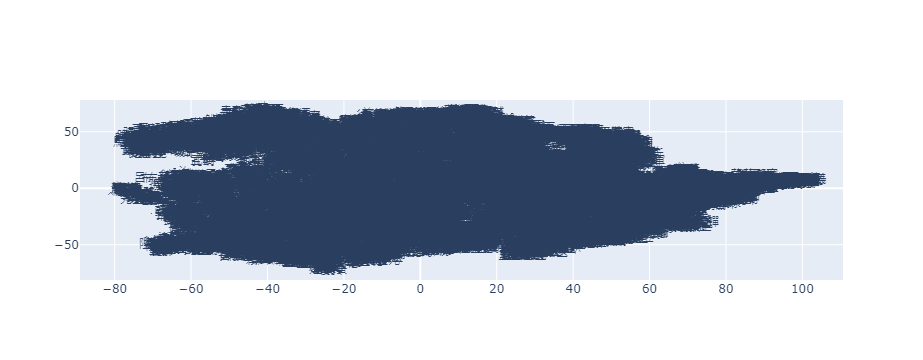

In [46]:
def plot_with_plotly(x_vals, y_vals, labels, plot_in_notebook=True):
    from plotly.offline import init_notebook_mode, iplot, plot
    import plotly.graph_objs as go

    trace = go.Scatter(x=x_vals, y=y_vals, mode='text', text=labels)
    data = [trace]

    if plot_in_notebook:
        init_notebook_mode(connected=True)
        iplot(data, filename='word-embedding-plot')
    else:
        plot(data, filename='word-embedding-plot.html')


def plot_with_matplotlib(x_vals, y_vals, labels):
    import matplotlib.pyplot as plt
    import random

    random.seed(0)

    plt.figure(figsize=(12, 12))
    plt.scatter(x_vals, y_vals)

    #
    # Label randomly subsampled 25 data points
    #
    indices = list(range(len(labels)))
    selected_indices = random.sample(indices, 25)
    for i in selected_indices:
        plt.annotate(labels[i], (x_vals[i], y_vals[i]))

try:
    get_ipython()
except Exception:
    plot_function = plot_with_matplotlib
else:
    plot_function = plot_with_plotly

plot_function(x_vals, y_vals, labels)

### jupyter lab not displaying plots
### ref: https://stackoverflow.com/questions/54064245/plot-ly-offline-mode-in-jupyter-lab-not-displaying-plots